In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from IPython.display import HTML
import random

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-06-25 06:31:56.387934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 06:31:56.388059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 06:31:56.531480: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/dataset-decription-to-academic-success-season4-6/Dataset_Description.xlsx
/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


# <p style="background-color: #E2CECA; font-family: Times New Roman; color: black; font-size: 140%; text-align: center; border-radius: 20px 20px; padding: 15px;"><strong>About Dataset</strong></p>


**For what purpose was the dataset created?**

    The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 

    The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. 

    The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course. 
    
    
**What do the instances in this dataset represent?**

    Each instance is a student

In [2]:
df_description = pd.read_excel("/kaggle/input/dataset-decription-to-academic-success-season4-6/Dataset_Description.xlsx",
                              header = 0)
HTML(df_description.to_html())

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated,NaN,no
1,Application mode,Feature,Integer,NaN,"1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)",NaN,no
2,Application order,Feature,Integer,NaN,Application order (between 0 - first choice; and 9 last choice),NaN,no
3,Course,Feature,Integer,NaN,33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance),NaN,no
4,Daytime/evening attendance,Feature,Integer,NaN,1 – daytime 0 - evening,NaN,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle),NaN,no
6,Previous qualification (grade),Feature,Continuous,NaN,Grade of previous qualification (between 0 and 200),NaN,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian,NaN,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2

**The goal of this competition is to predict academic risk of students in higher education. I am gonna try to predict Target feature which can be dropout, enrolled and graduate**

# <p style="background-color: #986156; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>CONFIGURATION</strong></p>

In [3]:
class config:
    dir_train = "/kaggle/input/playground-series-s4e6/train.csv"
    dir_test = "/kaggle/input/playground-series-s4e6/test.csv"
    dir_sub = "/kaggle/input/playground-series-s4e6/sample_submission.csv"
    
    n_splits = 5

# <p style="background-color: #53B4E7; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong> Import Datasets and Basic Eda</strong></p>

In [4]:
# Import train, test and submission datasets
df_train = pd.read_csv(config.dir_train)
df_test = pd.read_csv(config.dir_test)
df_sub = pd.read_csv(config.dir_sub)

In [5]:
#Display head of train dataset
print(f"Head of Train Dataset \n")
df_train.head()

Head of Train Dataset 



,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
#Display head of train dataset
print(f"Head of Test Dataset \n")
df_test.head()

Head of Test Dataset 



,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

## <p style="background-color: #9ADDA0; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong> Comparison of Test and Train Dataset</strong></p>

<p style="font-family: Times New Roman; color: white; font-size: 100%; text-align: left; border-radius: 15px 15px; padding: 15px;"> For the test set to be representative of the training set, the data set distributions must be similar. I will check this here</p>

In [9]:
def plot_pie(
            dataframe: pd.DataFrame,
            list_features: list,
            title: str,
            nrows : int = 2,
            ncols : int = 5
):
    """
        This function plots pie graph for features

    """
    #Create figure and axes for plot graph
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (ncols * 4, nrows*4))
    
    #Flatten axes
    ax = ax.flatten()
    
    for idx, column in enumerate(list_features):
        
        #Get value counts of feature
        value_count_feature = dataframe[column].value_counts()
        #Plot pie graph
        ax[idx].pie(value_count_feature.values, 
                    labels = value_count_feature.index,
                    startangle = 140,
                    autopct='%1.1f%%')
        #Set title for axis
        ax[idx].set_title(f"{column} Pie Chart")
        ax[idx].legend()
    
    
    #Remove empty slots
    for i in range(len(list_features), nrows * ncols):
        fig.delaxes(ax[i])

    #Set title for figure
    fig.suptitle(f"Categorical variables proportion for {title} Set",
                fontsize = 16,
                fontweight = "bold",
                y = 0.95)
    #Display pie graph
    plt.show()

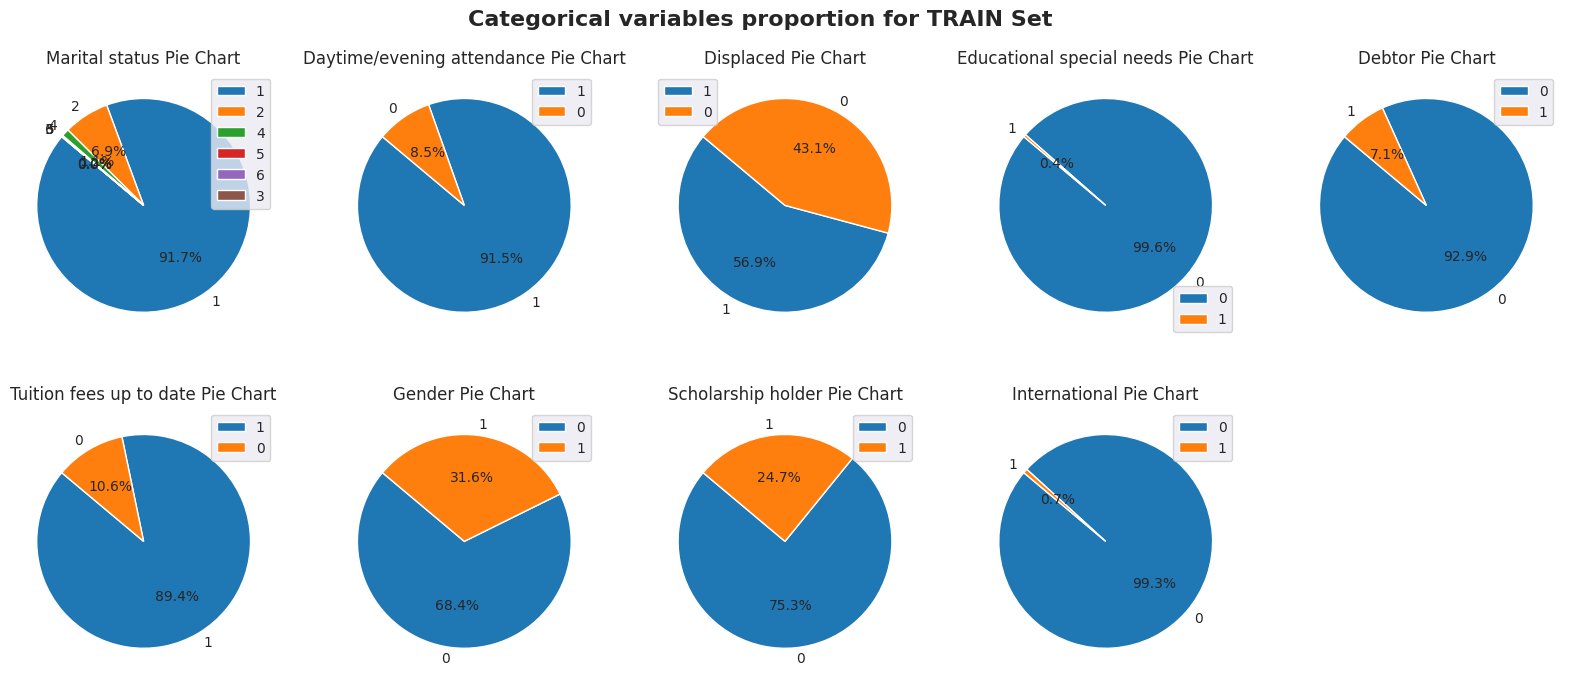

In [10]:
#Comparison categorical features proportion between train to test set
cat_features = [
        "Marital status",
        #"Application mode",
        #"Application order",
        #"Course",
        "Daytime/evening attendance",
        #"Previous qualification",
        #"Nacionality",
        #"Mother's qualification",
        #"Father's qualification",
        #"Mother's occupation",
        #"Father's occupation",
        "Displaced",
        "Educational special needs",
        "Debtor",
        "Tuition fees up to date",
        "Gender",
        "Scholarship holder",
        "International"
]

#Plot pie graph for categorical variables in train set
plot_pie(dataframe = df_train,
        list_features = cat_features,
        title = "TRAIN")

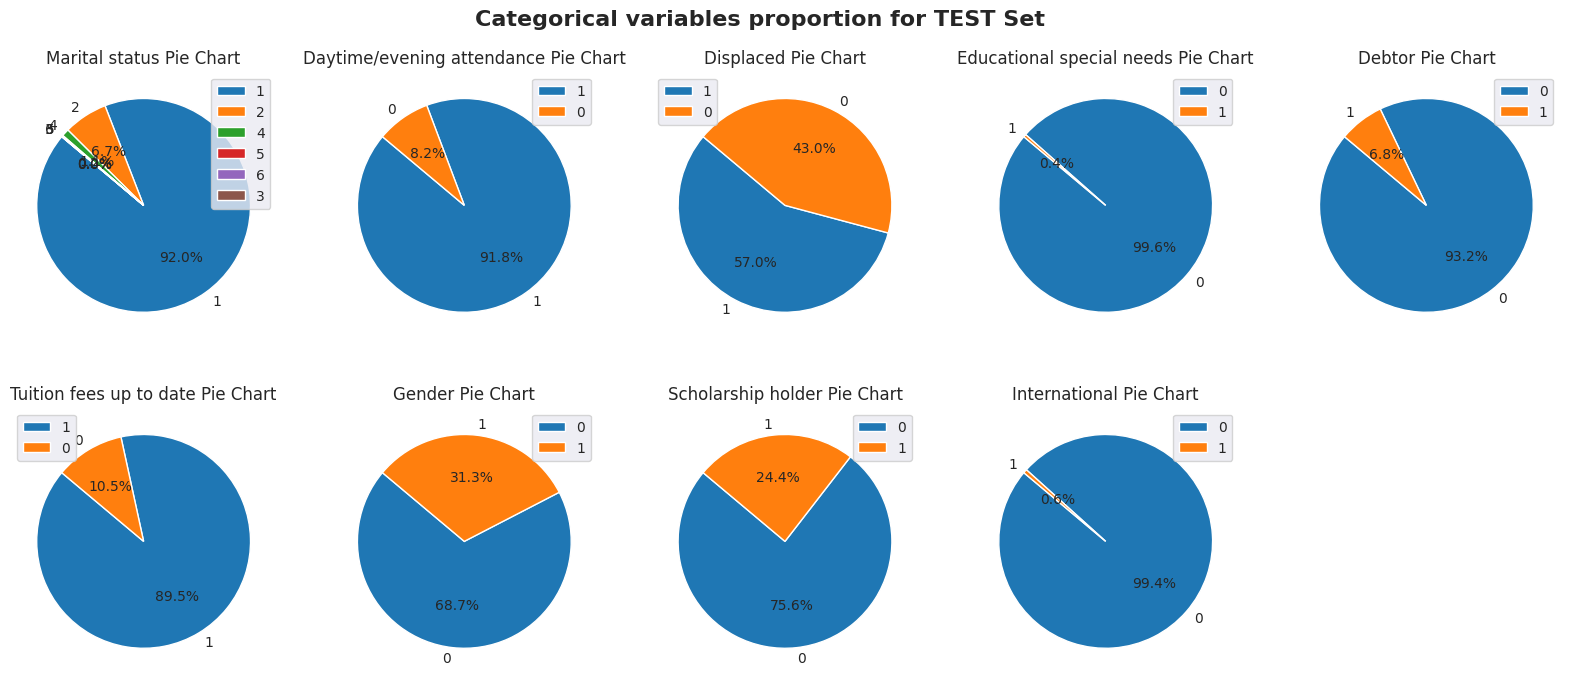

In [11]:
#Plot pie graph for categorical variables in test set
plot_pie(dataframe = df_test,
        list_features = cat_features,
        title = "TEST")

<p style="font-family: Times New Roman; color: white; font-size: 130%; text-align: left; border-radius: 15px 15px; padding: 15px;"> In terms of categorical variables, Test set and Train set has similar proportion. So test set can represent train set </p>

In [12]:
def plot_kdeplot(
            dataframe_list: [pd.DataFrame, pd.DataFrame],
            list_features: list,
            nrows: int = 3,
            ncols: int = 6
):
    
    """
        This function plot probability distributions for numerical features in Train and Test set to compare them.
        I just want to learn if this sets same distributions for nuemrical variables
    
    """
    #Create figure and axes for lineplot 
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (ncols * 6, nrows * 6))
    #Flatten axes
    ax = ax.flatten()
    
    for idx, feature in enumerate(list_features):
        #Plot kdeplot
        sns.kdeplot(dataframe_list[0][feature], ax = ax[idx], color = "green", label = "Train")
        sns.kdeplot(dataframe_list[1][feature], ax = ax[idx], color = "orange", label = "Test")
        #Set title for axis
        #ax[idx].set_title(f"{feature}")
        #Display title
        ax[idx].legend()
    
    #Set title for figure
    fig.suptitle(f"Comparison of Probability Disributions for TRAIN and TEST Set",
                fontsize = 16,
                fontweight = "bold",
                y = 0.95)
    #Display kdeplot 
    plt.show()
        

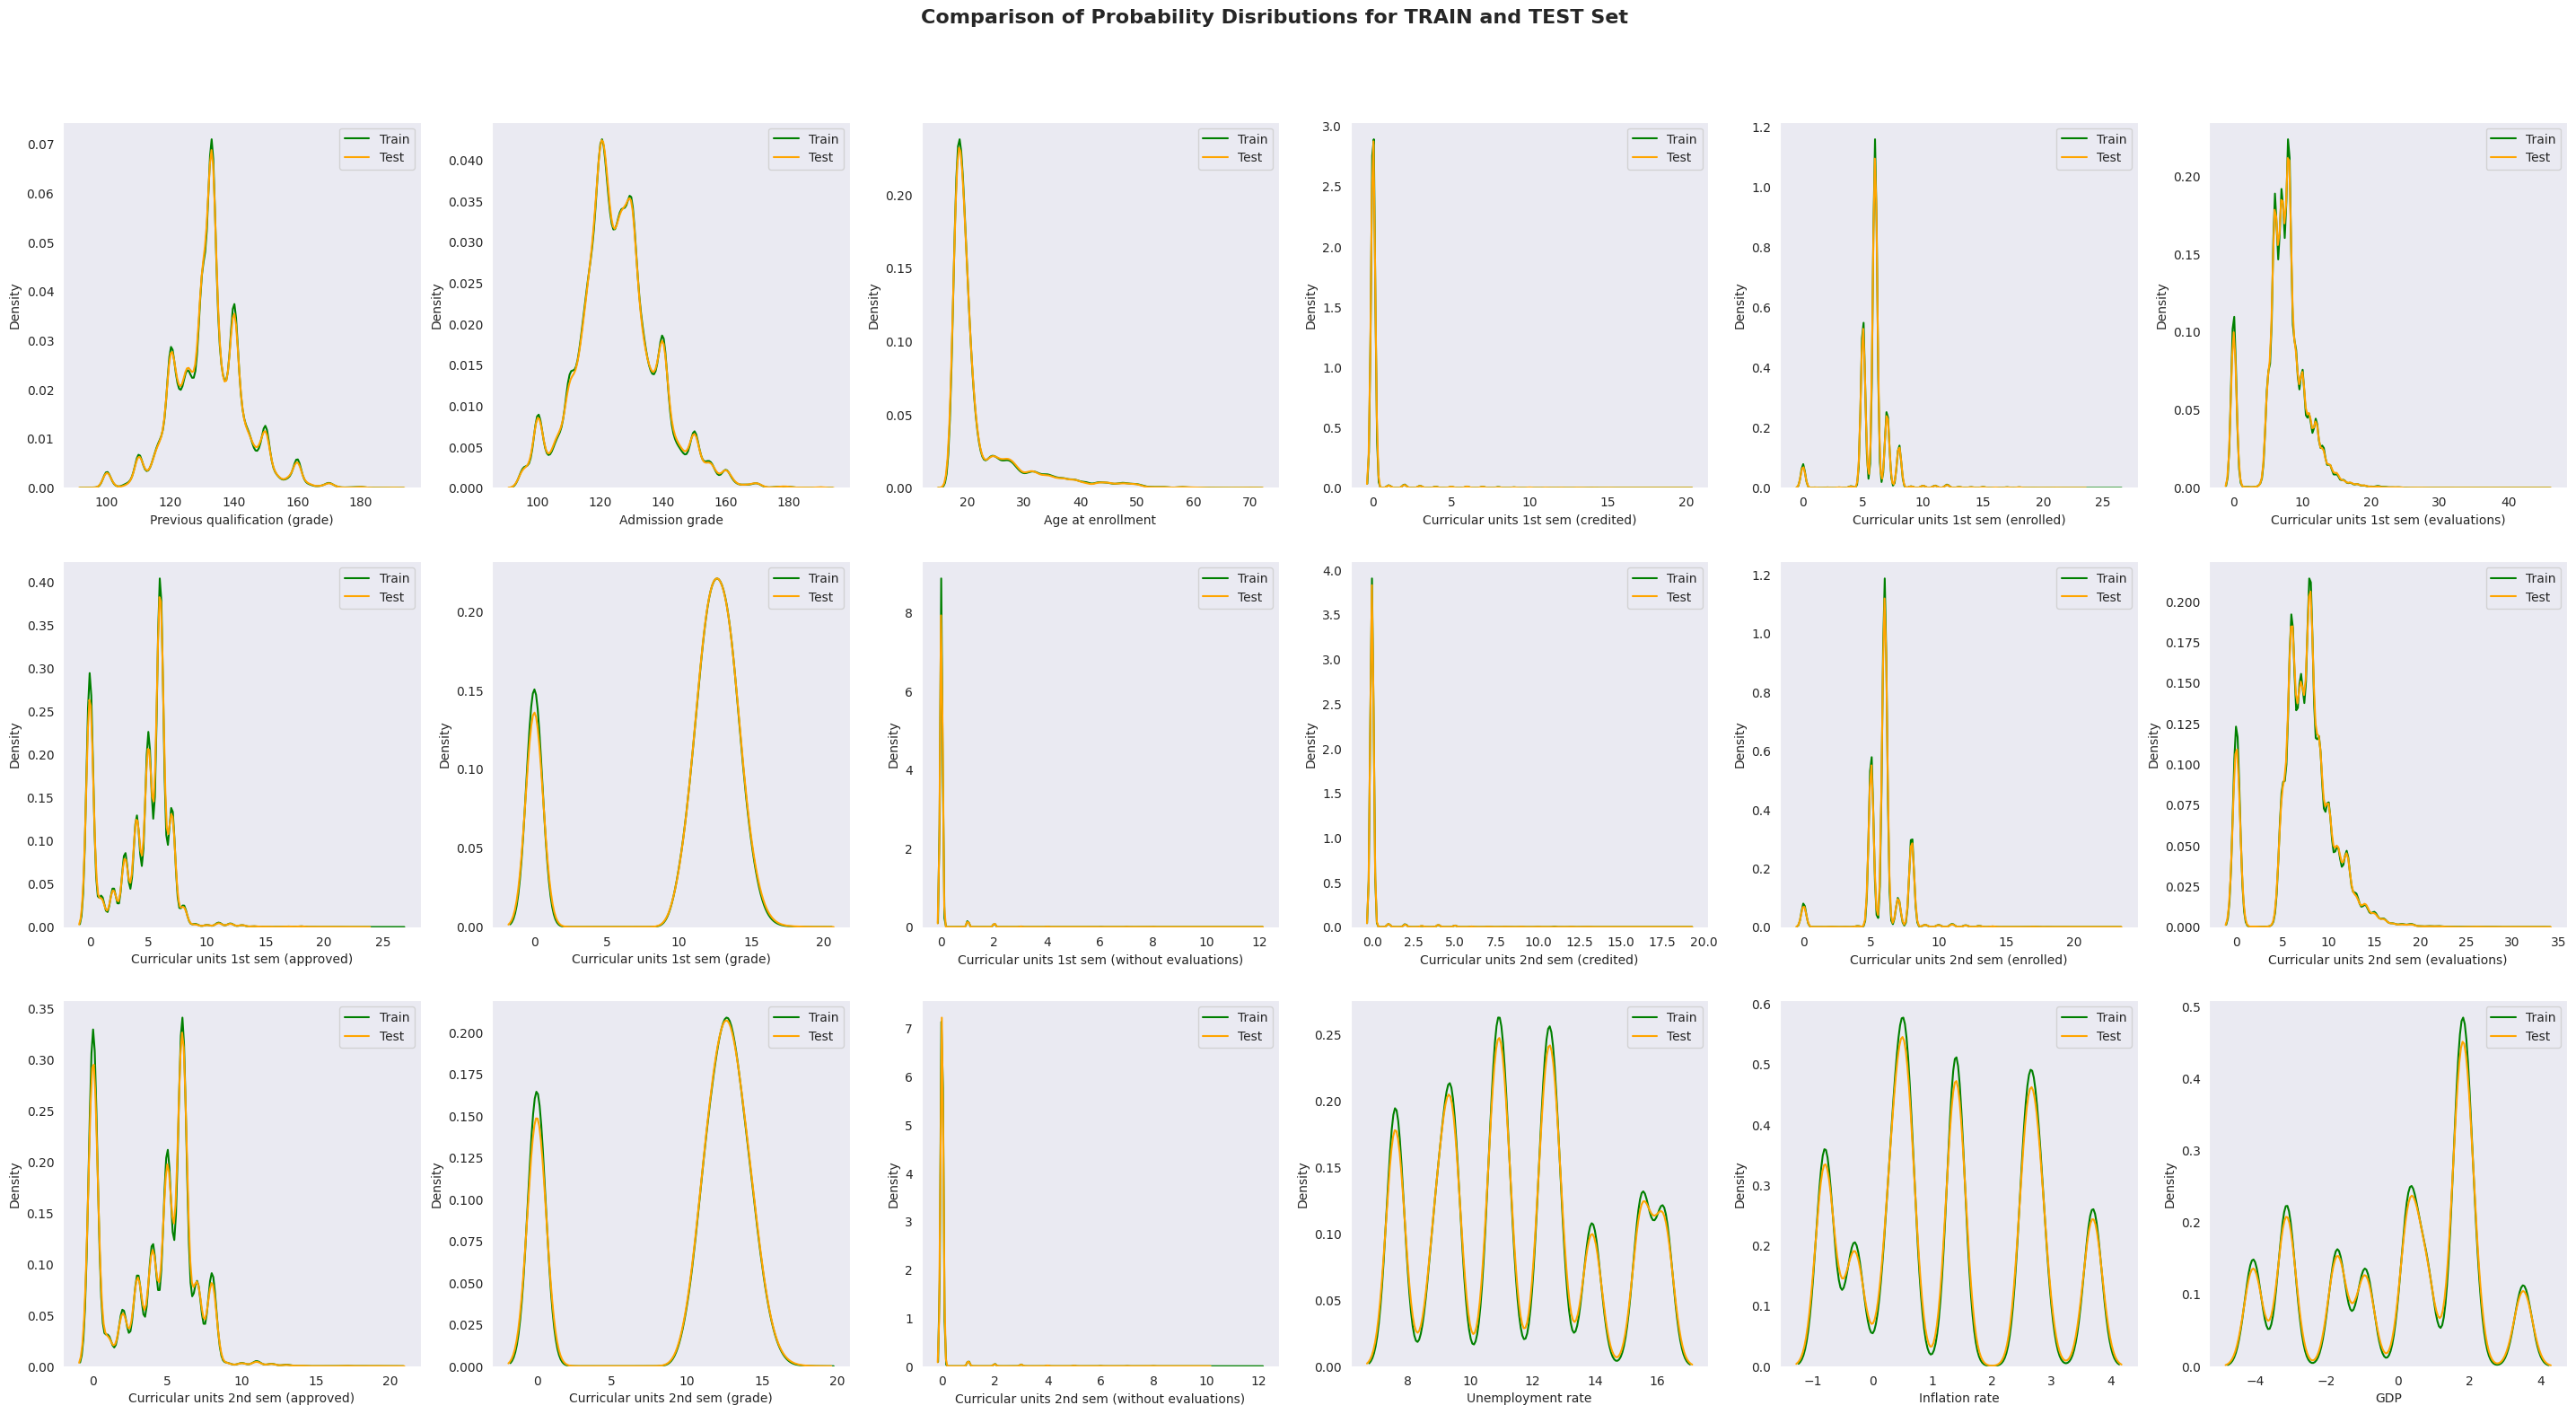

In [13]:
numerical_features= [
        "Previous qualification (grade)",
        "Admission grade",
        "Age at enrollment",
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (without evaluations)", 
        "Unemployment rate",
        "Inflation rate", 
        "GDP"
]
#Plot probabality distributions for numerical variables in train and test set to compare 
plot_kdeplot(dataframe_list = [df_train, df_test],
            list_features = numerical_features
            )

<p style="font-family: Times New Roman; color: white; font-size: 130%; text-align: left; border-radius: 15px 15px; padding: 15px;"> In terms of numerical variables, Test and train set have similar probability distributions. So Test set can represent train set</p>

# <p style="background-color: #17333D; font-family: Times New Roman; color: white; font-size: 150%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong> EDA</strong></p>

In [14]:
def plot_countplot_categoric(
                dataframe: pd.DataFrame,
                list_features: list,
                nrows: int = 2,
                ncols: int = 5
):
    """
        This function plots countplot for categoric features in each of values of target feature 
    """
    #Create figure and axes
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (ncols * 6, nrows * 6))
    #Flatten axes
    ax = ax.flatten()
    
    for idx, feature in enumerate(list_features):
        #Plot countplot
        sns.countplot(x = feature, hue = "Target", data = dataframe, ax = ax[idx])
    
    #Remove empty slots 
    for i in range(len(list_features), nrows * ncols):
        fig.delaxes(ax[i])
    
    #Set general title 
    fig.suptitle(f"Countplot of Categorical Features in Each Target Values",
                fontsize = 16,
                fontweight = "bold",
                y = 0.95)
    #Display graph
    plt.show()

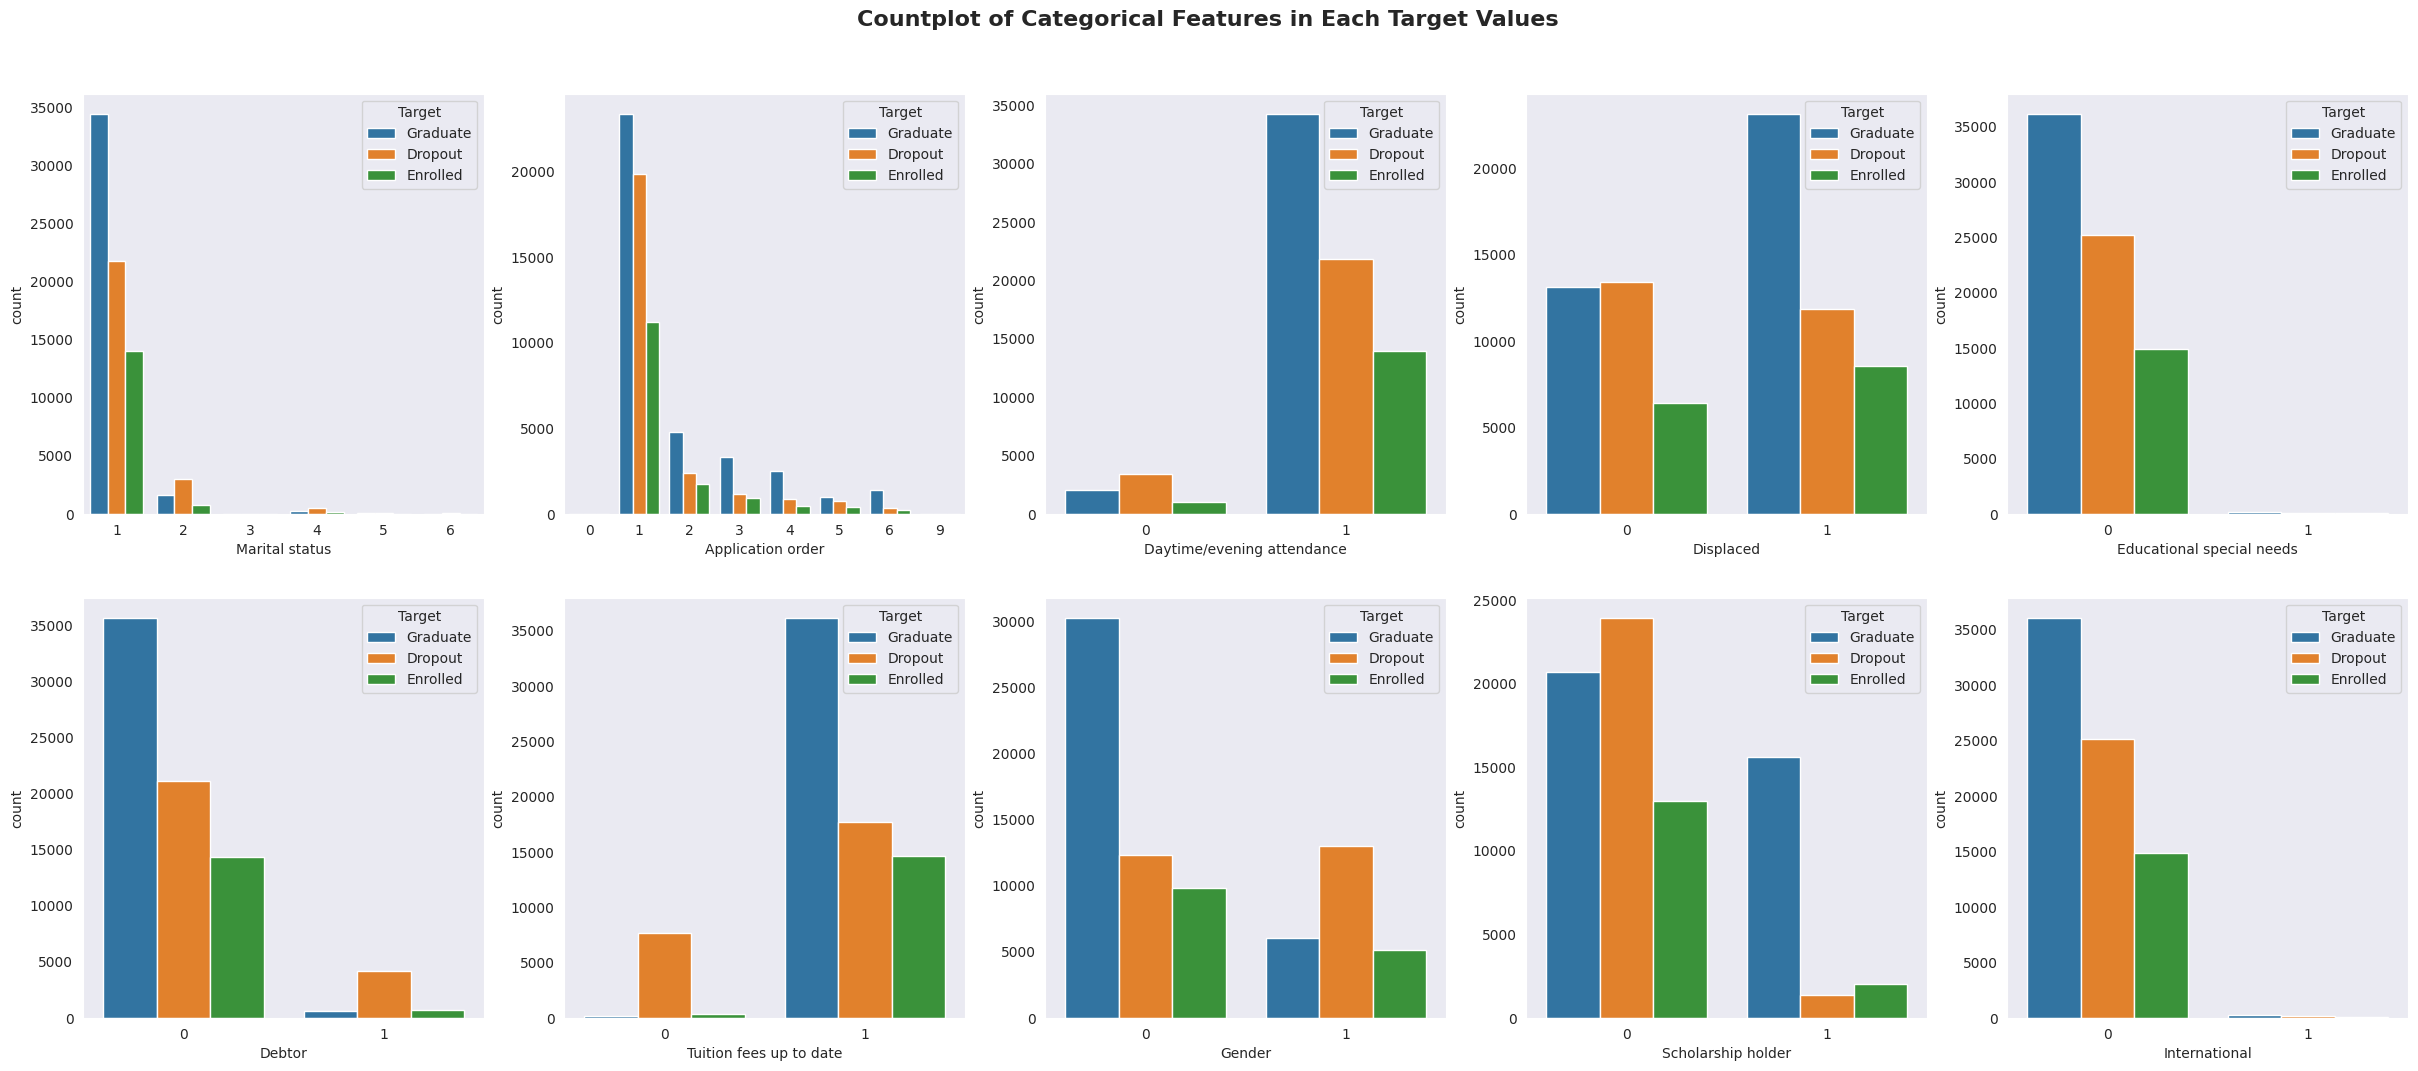

In [15]:
cat_features = [
        "Marital status",
        #"Application mode",
        "Application order",
        #"Course",
        "Daytime/evening attendance",
        #"Previous qualification",
        #"Nacionality",
        #"Mother's qualification",
        #"Father's qualification",
        #"Mother's occupation",
        #"Father's occupation",
        "Displaced",
        "Educational special needs",
        "Debtor",
        "Tuition fees up to date",
        "Gender",
        "Scholarship holder",
        "International"
]

plot_countplot_categoric(dataframe = df_train,
                        list_features = cat_features)

In this graph, I examine some categorcal features countplot to get some intuition.
- Marital status: Those marital status is single (1) mostly graduated,  Those marital status is married (2) and divorced (4) mostly dropout.
- Application order: In each application order choices, Majority is graduated and minority is enrolled.
- Daytime/evening attendance: In most of the evening courses students dropped out, while in most of the daytime courses students passed. The fact that the course was held in the evening had a negative impact on the students.
- Displaced: In most of the rows with Displaced as no (0), students dropped the course, while in most of the rows with Displaced as yes (1), students graduated.
- Debtor: Most of the debtor students dropped the course, while most of the non-debtor students graduated.
- Tuition feed up to date: in courses with tuition fees up to date of 1, the majority of students graduated, while in courses with tuition fees up to date of 0, the majority of students dropped.
- Gender: While most of the male students dropped, most of the female students passed the course.
- Scholarship holder: While the majority of scholarship students graduated, the majority of non-scholarship students dropped.

In [16]:
def plot_kdeplot_hueTarget(
            list_features: list,
            dataframe: pd.DataFrame = df_train
            

):
    """
        This function plot probability distributions for the first show_count(parameter) values with hue Target
    """
    #Create figure and axes
    fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (18, 36))
    #Flatten axes
    ax = ax.flatten()
    
    for idx, feature in enumerate(list_features):
        #Plot kdeplot with hue Target
        sns.kdeplot(data = dataframe, x = feature, hue = "Target", ax = ax[idx])
    #Set general title
    fig.suptitle(f"Probability Distributions with Hue as Target",
                fontsize = 16,
                fontweight = "bold",
                y = 0.90)
    #Display lineplot
    plt.show()

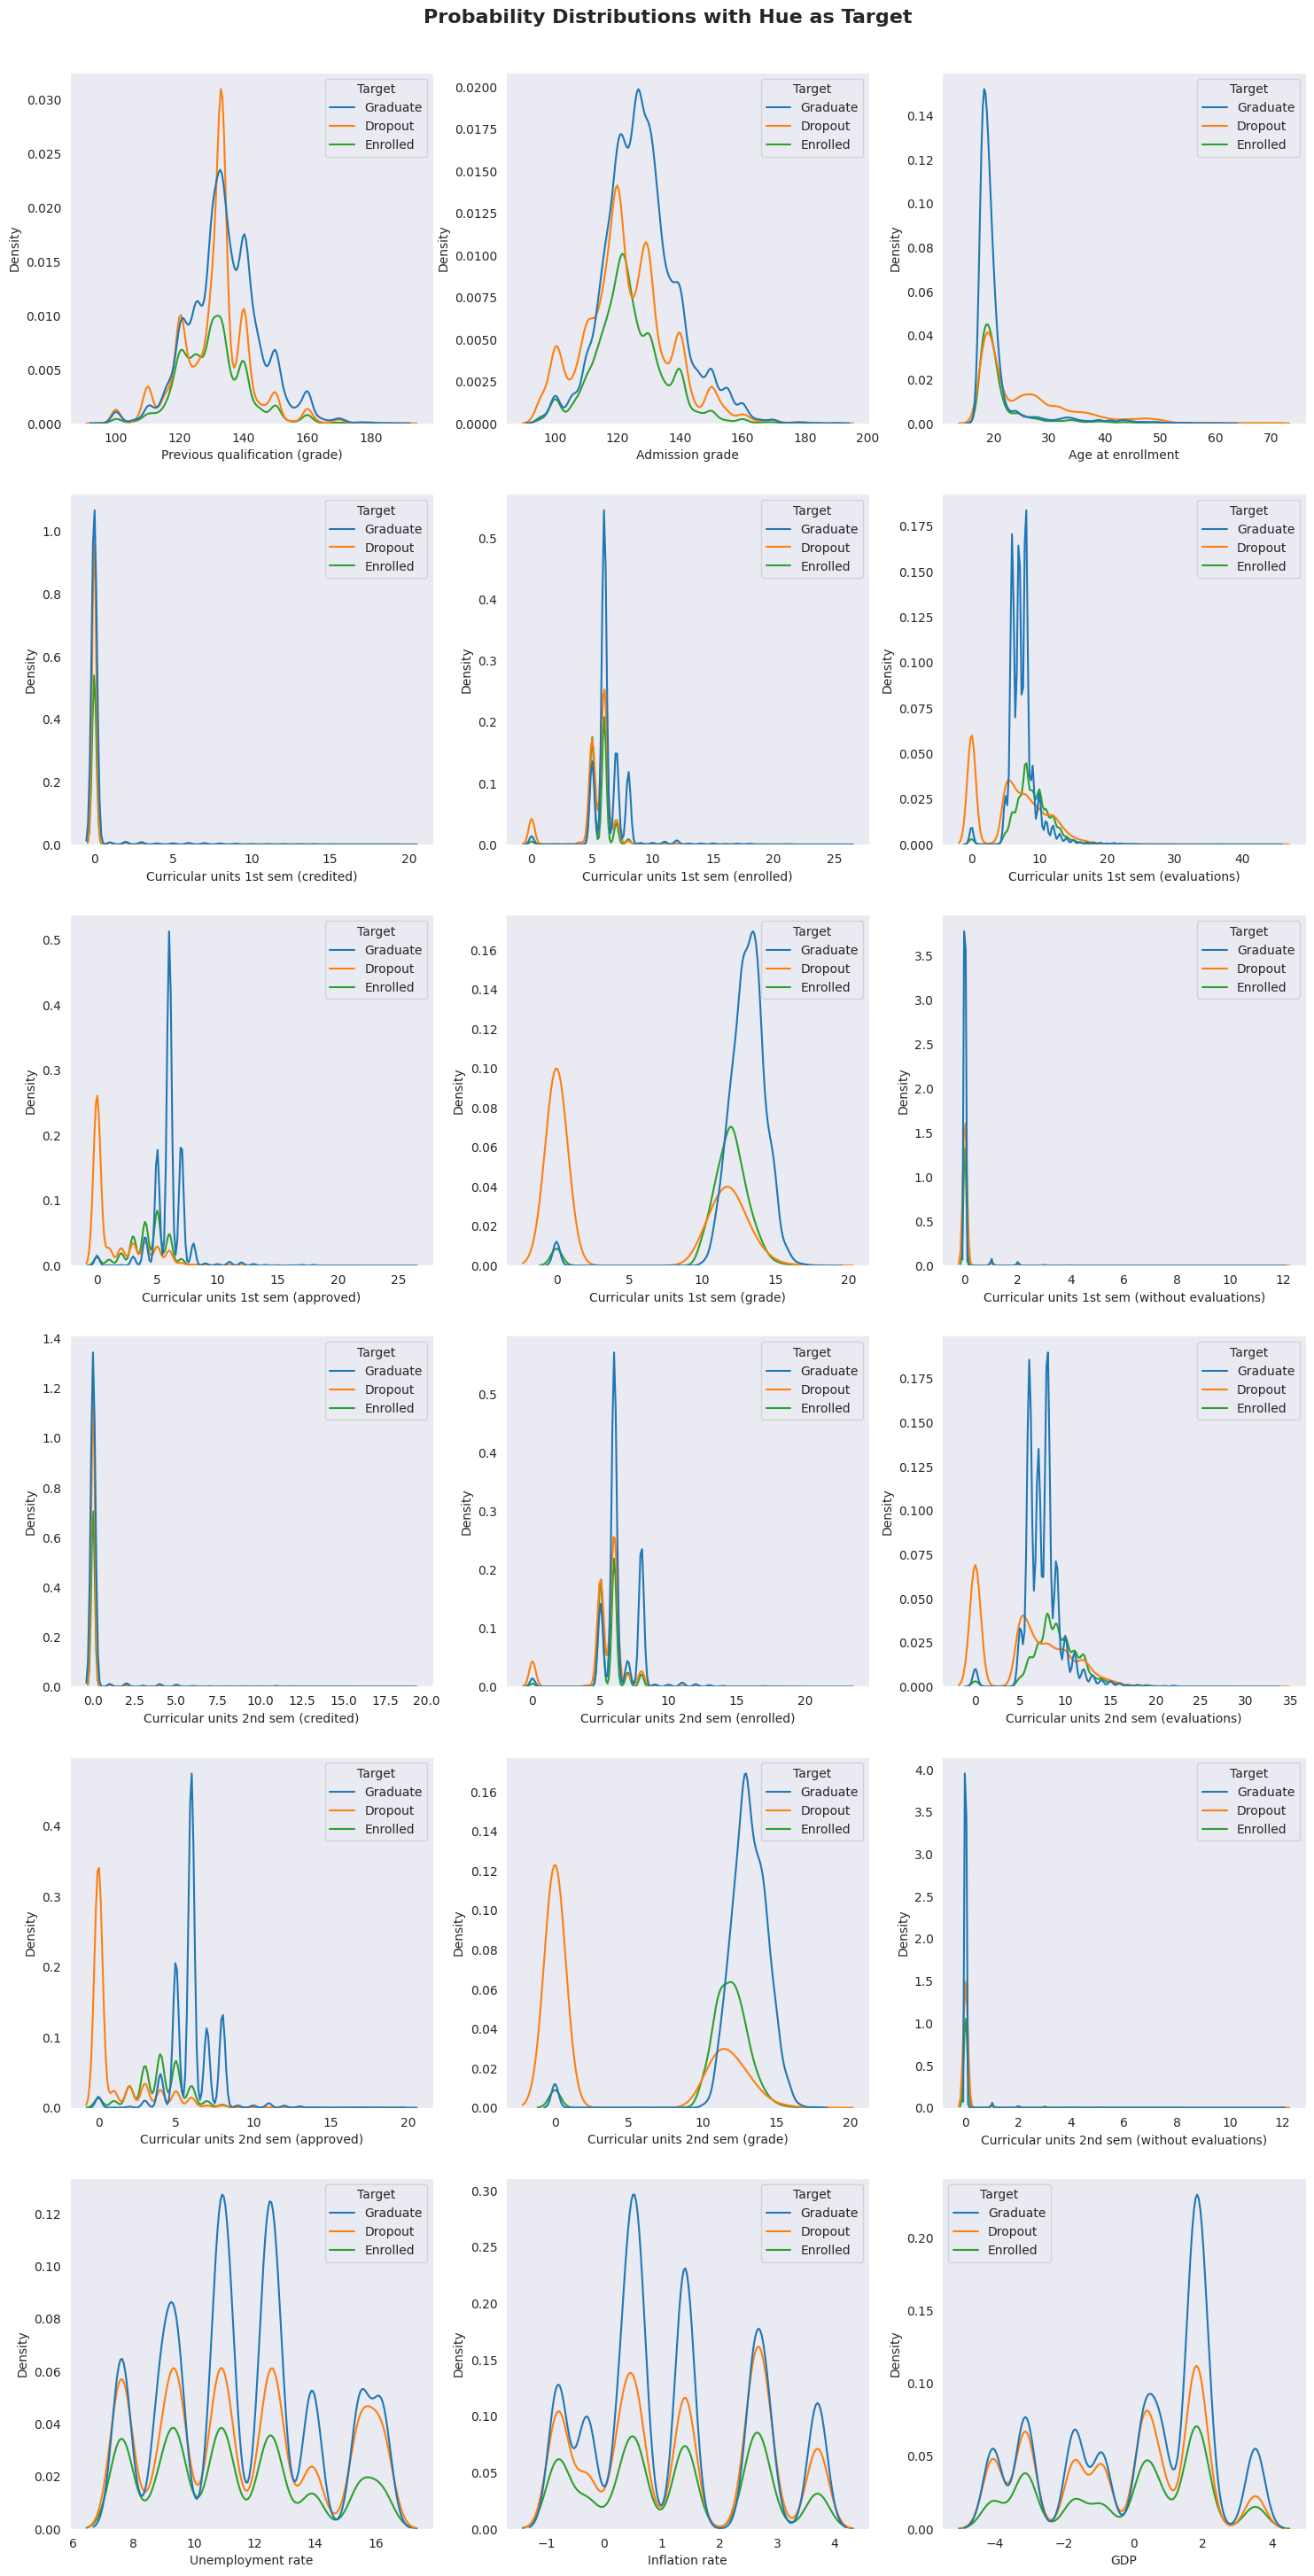

In [17]:
plot_kdeplot_hueTarget(numerical_features)

I am gonna evaluate the features which has differences in terms of probablity distributions
- Curricular units 2nd sem (grade): It means grade average in the 2nd semester (between 0 and 20). Most studens dropped are clustered around 0, while most students graduated are clustered around 13.
- Curricular units 2nd sem (approved): It means number of curricular units approved in the 2nd semester. Most studens dropped are clustered around 0
- Curricular units 2nd sem (evaluations): It means number of evaluations to curricular units in the 2nd semester. Most studens dropped are clustered around 0
- Curricular units 1st sem (grade): It means grade average in the 1st semester (between 0 and 20). Most studens dropped are clustered around 0, while most students graduated are clustered around 13.
- Curricular units 1st sem (approved): It means number of curricular units approved in the 1st semester. Most studens dropped are clustered around 0
- Curricular units 1st sem (evaluations): It means number of evaluations to curricular units in the 1st semester. Most studens dropped are clustered around 0

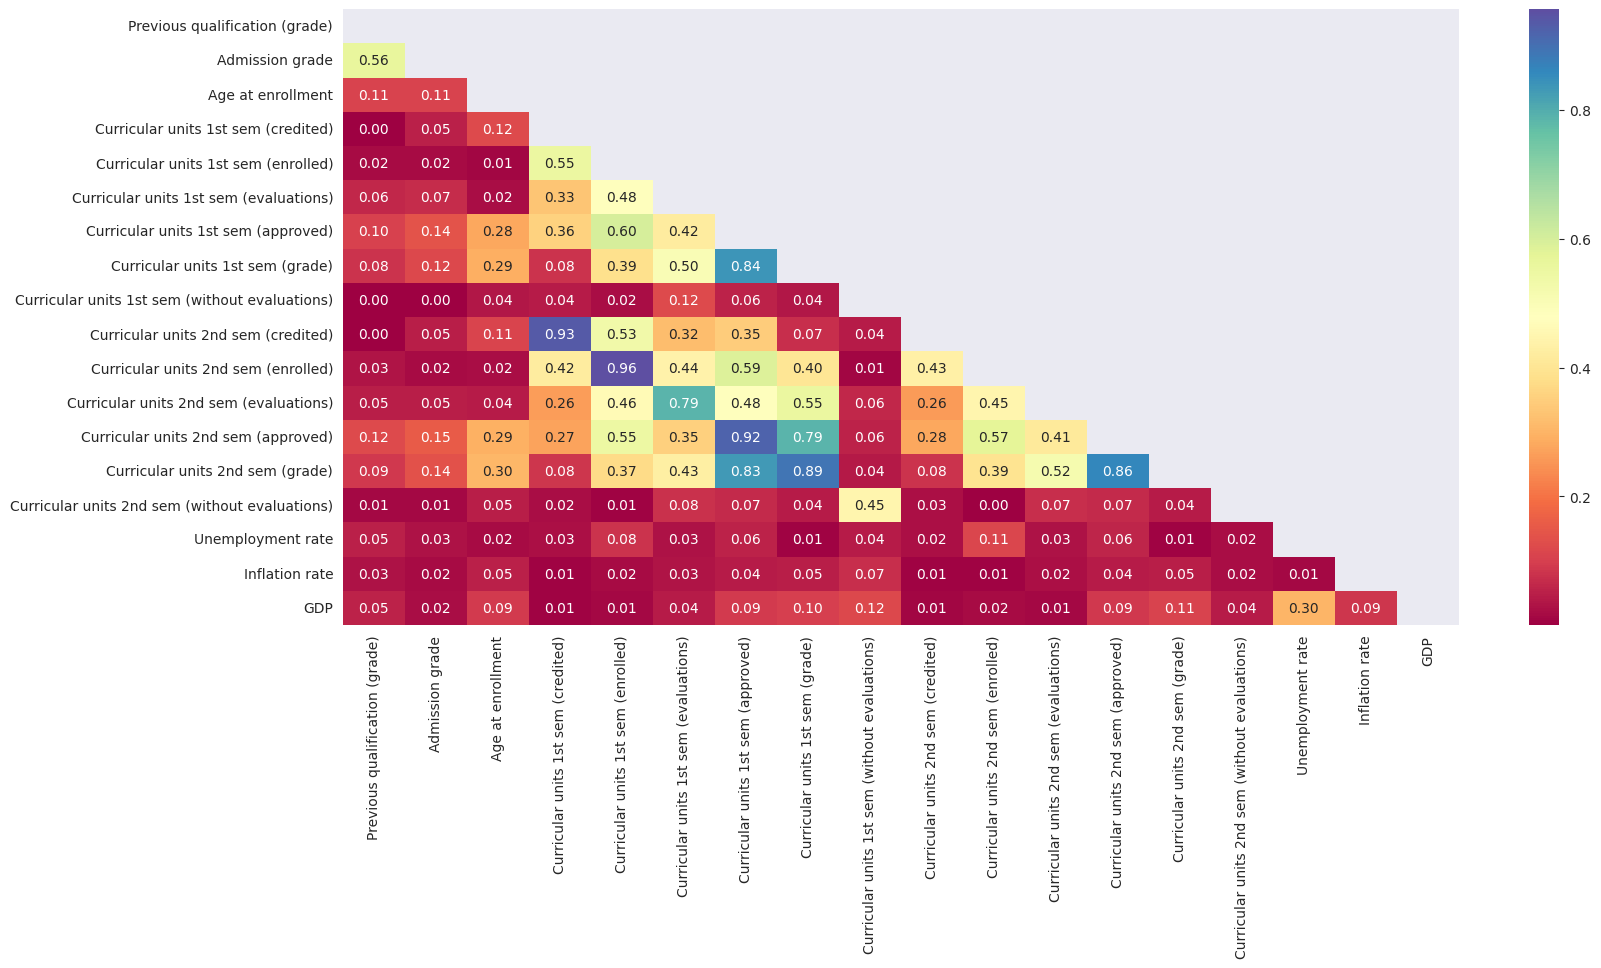

In [18]:
#Create figure
plt.figure(figsize = (18, 8))
#Determine correlations
correlations = df_train[numerical_features].corr().abs()
#Determine mask for heatmap
mask = np.triu(np.ones_like(correlations, dtype = "bool"))
#Plot heatmap
sns.heatmap(correlations, annot = True, fmt = ".2f", cmap = "Spectral", mask = mask)
#Display graph
plt.show()

According to correlations map:
- Curricular units 1st sem (grade) and Curricular units 1st sem (approved)
- Curricular units 2nd sem (credited) and Curricular units 1st sem (credited)
- Curricular units 2nd sem (enrolled) and Curricular units 1st sem (enrolled)
- Curricular units 2nd sem (evaluations) and Curricular units 1st sem (evaluations)
- Curricular units 2nd sem (approved) and Curricular units 1st sem (approved)
- Curricular units 2nd sem (approved) and Curricular units 1st sem (grade)
- Curricular units 1st sem (approved) and Curricular units 2nd sem (grade)
- Curricular units 1st sem (grade) and Curricular units 2nd sem (grade)
- Curricular units 2nd sem (grade) and Curricular units 2nd sem (approved)

has high correlations. So I will remove features:
- Curricular units 1st sem (grade)
- Curricular units 1st sem (credited)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (evaluations)
- Curricular units 2nd sem (approved)


In [19]:
#Determine highly correlated features
removed_features = [
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (approved)"
    
]
#Remove highly correlated features from train and test set
df_train = df_train.drop(removed_features, axis = 1)
df_test = df_test.drop(removed_features, axis = 1)

## <p style="background-color: #818174; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Find Best Distributions for Numerical Variables</strong></p>

In [20]:
pip install distfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
from distfit import distfit 

<p style="font-family: Times New Roman; color: white; font-size: 130%; text-align: left; border-radius: 15px 15px; padding: 15px;">The distfit library can determine the best fit across 89 theoretical distributions which are utilized from the scipy library. To score the fit, there are four goodness-of-fit statistical tests; Residual Sum of Squares (RSS or SSE), Wasserstein, Kolmogorov-Smirnov (KS), and Energy. For each fitted theoretical distribution, the loc, scale, and arg parameters are returned, such as mean and standard deviation for normal distribution. <br><br>And also best practice is to use both statistics and a visual curation to decide what the best distribution fit is. Using the PDF/CDF and QQ plots can be some of the best tools to guide those decisions. These plots will help to visually guide whether a distribution is a good fit. We can see in graphs the PDF with the confidence intervals and the CDF plot. The confidence intervals are automatically set to 95% CII but can be changed using the alpha parameter during initialization. When using the plot functionality, it automatically shows the histogram in bars and with a line, PDF/CDF, and confidence intervals.<br/> <br/></p>

[Source](https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd)

In [22]:
def plot_continuous_distributions(dataframe: pd.DataFrame, 
                                  feature: str,
                               ):
    """
        This function finds best distribution for feature we want and plot PDF and CDF
    
    """
    
    
    #Create figure and axes
    fig, ax = plt.subplots(1, 3, figsize = (30, 10))
    #Flatten axes
    ax = ax.flatten()
    #Create distribution in popular distributions
    dfit = distfit(distr = "popular", n_boots = 10)
        
    #Fit and transform to feature
    results = dfit.fit_transform(dataframe.loc[~dataframe[feature].isnull(), feature].values)
    #Create graph to find best distribution
    dfit.plot_summary(n_top = 10, ax=ax[0])
    # PDF for only the best fit
    dfit.plot(chart='PDF', n_top=1, ax=ax[1])
    # CDF for the top 10 fits
    dfit.plot(chart='CDF', n_top=10, ax=ax[2])
    
    #Set title
    fig.suptitle(f"Probability Distribution for {feature}",
                fontsize = 16,
                fontweight = "bold",
                y = 0.95)
    
    #Show graph
    plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.04 sec] [RSS: 0.0684416] [loc=132.379 scale=10.995]
[distfit] >INFO> [expon     ] [0.04 sec] [RSS: 0.0976153] [loc=95.000 scale=37.379]
[distfit] >INFO> [pareto    ] [0.17 sec] [RSS: 0.0976153] [loc=-4294967201.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [2.47 sec] [RSS: 0.0614518] [loc=133.100 scale=9.023]
[distfit] >INFO> [t         ] [11.8 sec] [RSS: 0.067223] [loc=132.210 scale=8.913]
[distfit] >INFO> [genextreme] [7.74 sec] [RSS: 0.0693677] [loc=127.950 scale=10.836]
[distfit] >INFO> [gamma     ] [1.60 sec] [RSS: 0.0684621] [loc=-36.768 scale=0.713]
[distfit] >INFO> [lognorm   ] [0.21 sec] [RSS: 0.0684573] [loc=-114.130 scale=246.264]
[distfit] >INFO> [beta      ] [4.03 sec] [RSS: 0.0684595] [loc=-43.603 scale=2440142.711]
[distfit] >INFO> [uniform   ] [0.05 sec] [RSS: 0.0929411] [loc=95.000 scale=95.000]
[distfit] >INFO> [loggamma  ] [2.12 sec] [RSS: 0.0685465] [loc=-1839.288 scale=299.43

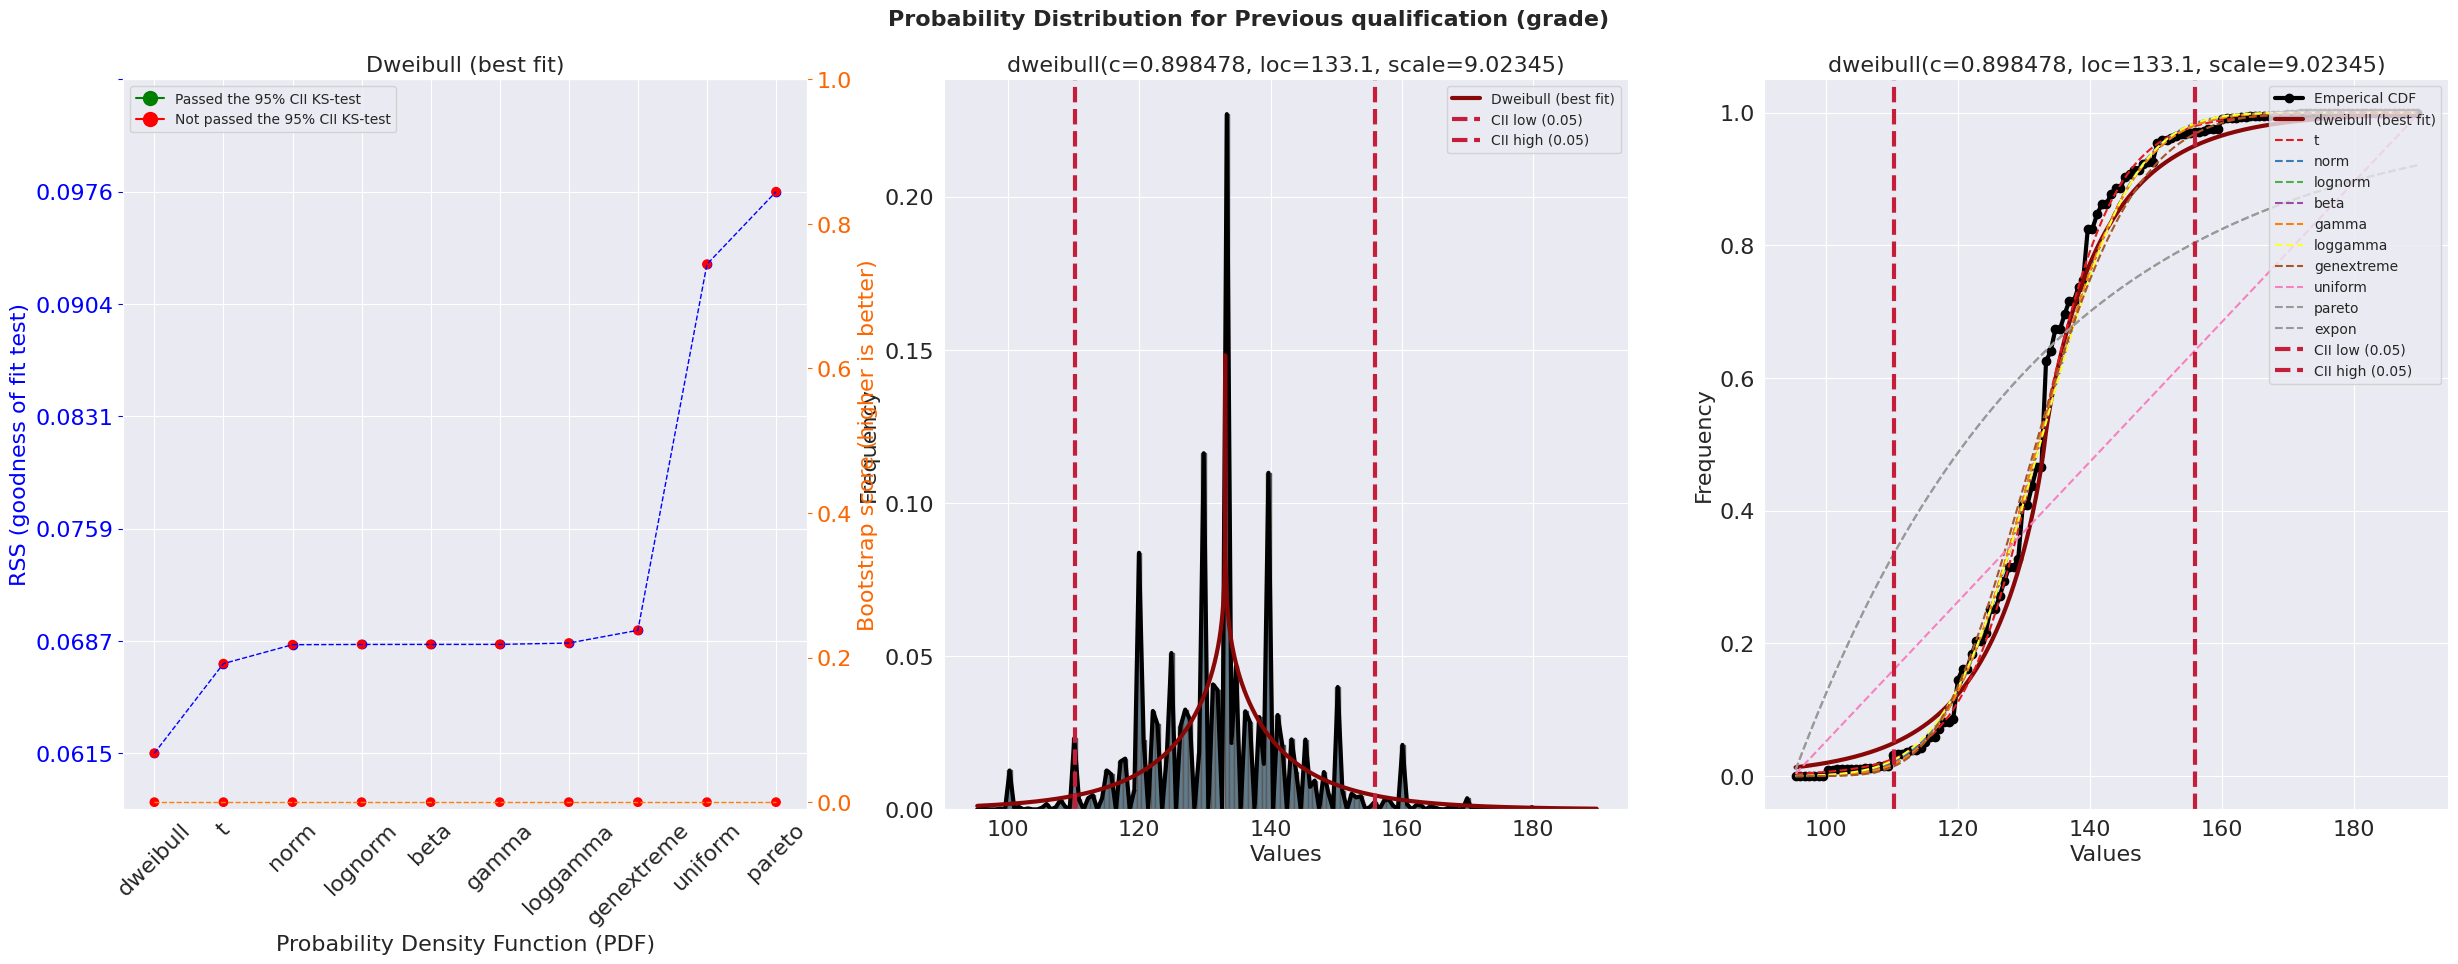

In [23]:
#Plot distrutions for Previous qualification (grade)
plot_continuous_distributions(dataframe = df_train,
                            feature = "Previous qualification (grade)")

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.11 sec] [RSS: 0.012659] [loc=125.364 scale=12.562]
[distfit] >INFO> [expon     ] [0.04 sec] [RSS: 0.0339445] [loc=95.000 scale=30.364]
[distfit] >INFO> [pareto    ] [0.17 sec] [RSS: 0.0339445] [loc=-4294967201.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [1.27 sec] [RSS: 0.0115654] [loc=124.660 scale=10.172]
[distfit] >INFO> [t         ] [12.4 sec] [RSS: 0.0126167] [loc=125.532 scale=12.378]
[distfit] >INFO> [genextreme] [8.03 sec] [RSS: 0.0127426] [loc=120.270 scale=11.860]
[distfit] >INFO> [gamma     ] [1.08 sec] [RSS: 0.0124505] [loc=38.682 scale=1.811]
[distfit] >INFO> [lognorm   ] [0.29 sec] [RSS: 0.0124234] [loc=2.276 scale=122.455]
[distfit] >INFO> [beta      ] [4.22 sec] [RSS: 0.0124621] [loc=43.175 scale=152983.554]
[distfit] >INFO> [uniform   ] [0.03 sec] [RSS: 0.0329357] [loc=95.000 scale=95.000]
[distfit] >INFO> [loggamma  ] [2.20 sec] [RSS: 0.0127907] [loc=-3401.134 scale=484.928]
[

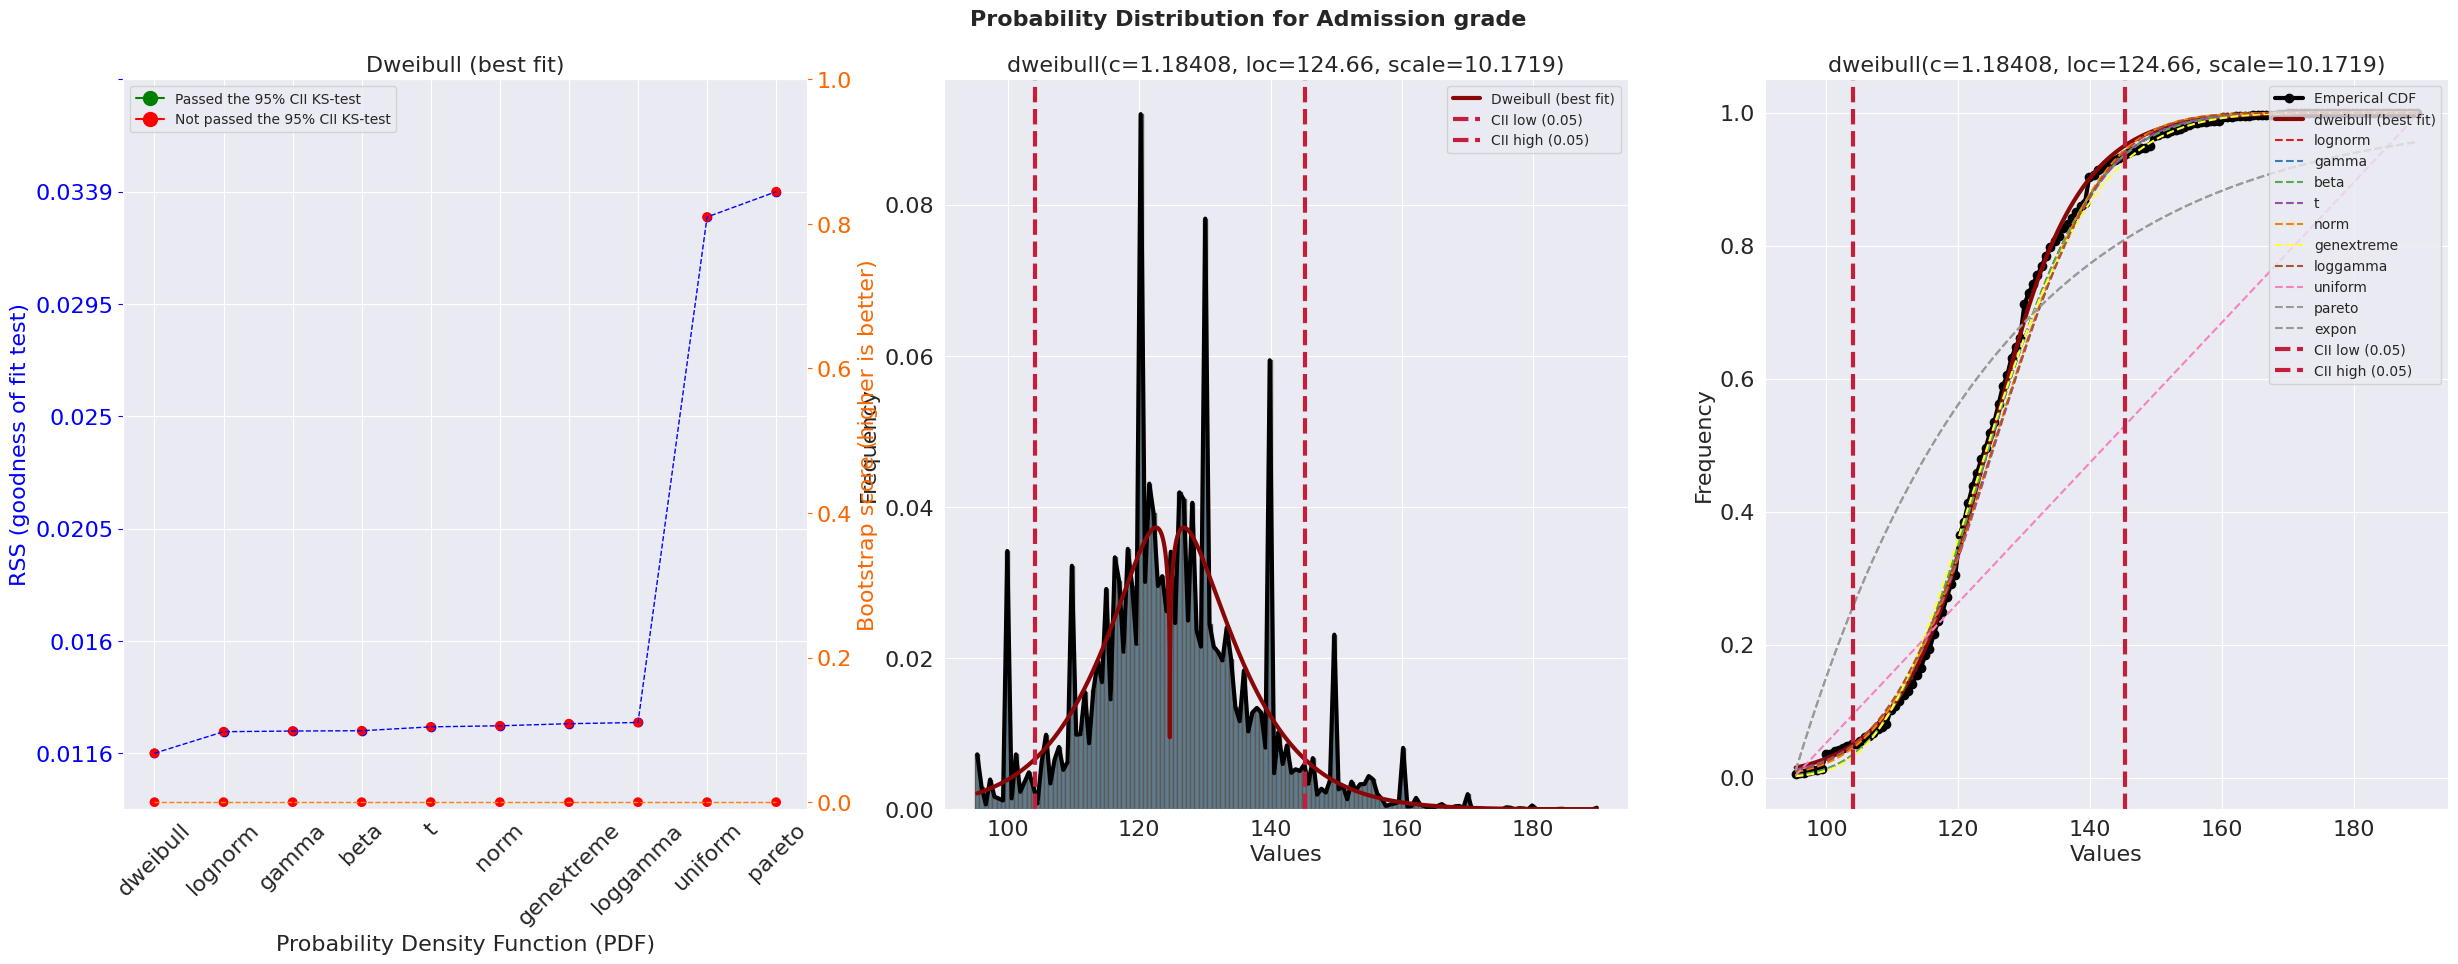

In [24]:
#Plot distrutions for Admission grade
plot_continuous_distributions(dataframe = df_train,
                            feature = "Admission grade")

# <p style="background-color: #757065; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>AutoEncoder for Dimensionality Reduction</strong></p>

<p style="font-family: Times New Roman; color: white; font-size: 130%; text-align: left; border-radius: 15px 15px; padding: 15px;"> I am gonna use Autoencoder to dimensionality reduction. But I dont want to use categorical features in dimensionality reduction. So just I am gonna use other features. Dimension will decrease from 13 to 4. Before dimensionality reduction I am gonna scale the features.  </p>

## <p style="background-color: #42cbf5; font-family: Times New Roman; color: white; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Scaled Data with MinMaxScaler</strong></p>

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
numerical_features= [feature for feature in numerical_features if not feature in removed_features]
print("Features that will decrease in dimension \n" + "\n".join(numerical_features))

#Scale data with MinMaxScaler
minmax_scaler = MinMaxScaler()
df_train[numerical_features] = minmax_scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = minmax_scaler.transform(df_test[numerical_features])

Features that will decrease in dimension 
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (approved)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


## <p style="background-color: #42cbf5; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>AutoEncoders</strong></p>

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [28]:
#Specify early stopping conditions
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=30,
    restore_best_weights = True
)

In [29]:
#Determine input dimension
input_dim = Input(shape = (len(numerical_features), ))

#This is the dimension of the latent space (encoding space)
latent_dim = 4

#Determine x_train for autoencoder model
X_train = df_train[numerical_features].copy()

#Split the data for validation and train set
X_train, X_test, y_train, y_test = train_test_split(X_train, df_train["Target"], train_size = 0.80, random_state = 42)

encoded1 =  Dense(512, activation = "leaky_relu")(input_dim)
encoded2 =  Dense(256, activation = "leaky_relu")(encoded1)
encoded3 =  Dense(128, activation = "leaky_relu")(encoded2)
encoded4 =  Dense(64, activation = "leaky_relu")(encoded3)
encoded5 =  Dense(32, activation = "leaky_relu")(encoded4)
encoded6 =  Dense(16, activation = "leaky_relu")(encoded5)
encoded7 =  Dense(8, activation = "leaky_relu")(encoded6)
encoded8 =  Dense(4, activation = "leaky_relu")(encoded7)
encoded9 =  Dense(latent_dim, activation = "leaky_relu")(encoded8)

decoded1 = Dense(4, activation = "leaky_relu")(encoded9)
decoded2 = Dense(8, activation = "leaky_relu")(decoded1)
decoded3 = Dense(16, activation = "leaky_relu")(decoded2)
decoded4 = Dense(32, activation = "leaky_relu")(decoded3)
decoded5 = Dense(64, activation = "leaky_relu")(decoded4)
decoded6 = Dense(128, activation = "leaky_relu")(decoded5)
decoded7 = Dense(256, activation = "leaky_relu")(decoded6)
decoded8 = Dense(512, activation = "leaky_relu")(decoded7)
decoded9 = Dense(len(numerical_features), activation = "sigmoid")(decoded8)

#Create autoencoder model
autoencoder = Model(inputs = input_dim, outputs = decoded9)
#Compile autoencoder model
autoencoder.compile(loss = "mse", 
                    optimizer = "adam", 
                    metrics = ["mae"]) 
#fit model
history = autoencoder.fit(X_train, X_train, 
                          epochs = 100, 
                          batch_size = 32, verbose = 1, 
                          validation_data = (X_test, X_test), 
                          shuffle = False, 
                          callbacks = [es])

Epoch 1/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0209 - mae: 0.0888 - val_loss: 0.0078 - val_mae: 0.0532
Epoch 2/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0074 - mae: 0.0498 - val_loss: 0.0066 - val_mae: 0.0493
Epoch 3/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0055 - mae: 0.0433 - val_loss: 0.0048 - val_mae: 0.0409
Epoch 4/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0053 - mae: 0.0423 - val_loss: 0.0034 - val_mae: 0.0328
Epoch 5/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0033 - mae: 0.0331 - val_loss: 0.0030 - val_mae: 0.0304
Epoch 6/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0031 - mae: 0.0318 - val_loss: 0.0027 - val_mae: 0.0303
Epoch 7/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0029 - mae: 0.0309 - val_loss: 0.0031 - val_mae: 0.0324
Epoch 8/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0027 - mae: 0.0293 - val_loss: 0.0024 - val_mae: 0.0270
Epoch 9/100
1913/1913 ━━

In [30]:
def plot_model_performance(history):
    """
        Plot train loss, accuracy and valdiation loss, accuracy
    
    """
    
    # plot model performance
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(history.epoch) + 1)

    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, mae, label="Train Set")
    plt.plot(epochs_range, val_mae, label="Val Set")
    plt.legend(loc="best")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Absolute Error")
    plt.title("Model MAE")

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Train Set")
    plt.plot(epochs_range, val_loss, label="Val Set")
    plt.legend(loc="best")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model Loss")

    plt.tight_layout()
    plt.show()

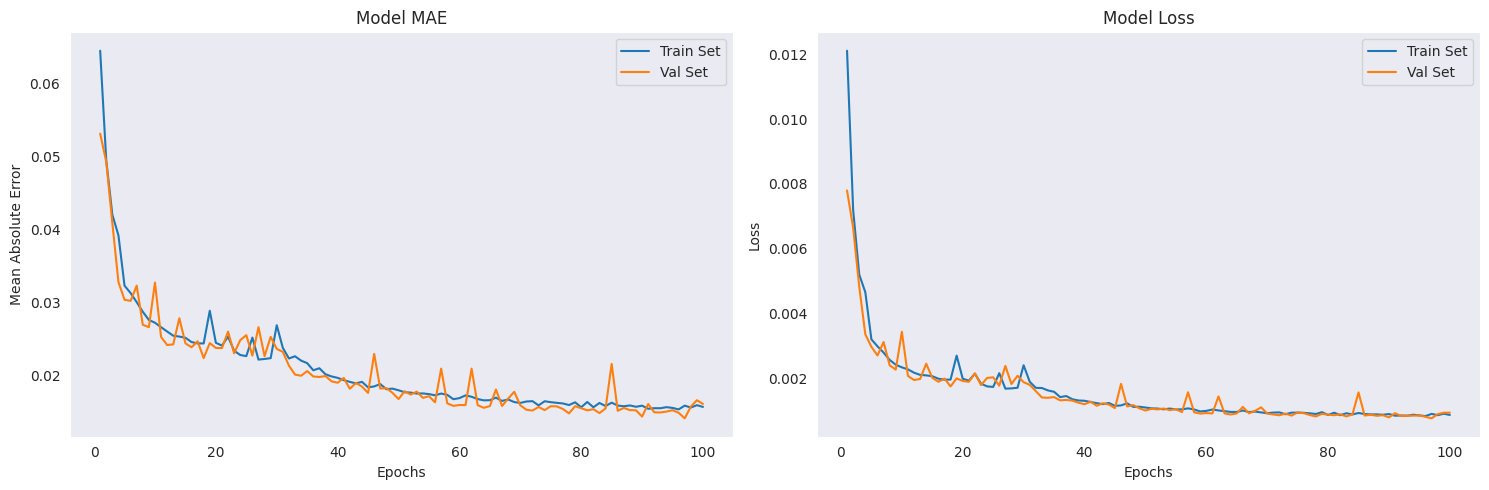

In [31]:
plot_model_performance(history)

In [32]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [33]:
def plot_orig_vs_recon(title="", n_samples=3):
    """
        This function compare reconstructed data with autoencoder and orginal data in three example
    """
    #Create figure
    fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(15,15))
    #Set title
    fig.suptitle(title, 
                 fontsize = 16,
                 fontweight = "bold",
                 y = 0.90)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        #Determine random integer value
        idx = random.sample(range(X_train.shape[0]), 1)
        #Plot reconstructed data
        plt.plot(autoencoder.predict(X_train.iloc[idx]).squeeze(), label="reconstructed")
        #Plot otiginal data
        plt.plot(X_train.iloc[idx].squeeze(), label= "original")
        #Set x axis names
        ax[i].set_xticklabels([])
        #Display title
        plt.legend()
       
    #Display graph
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


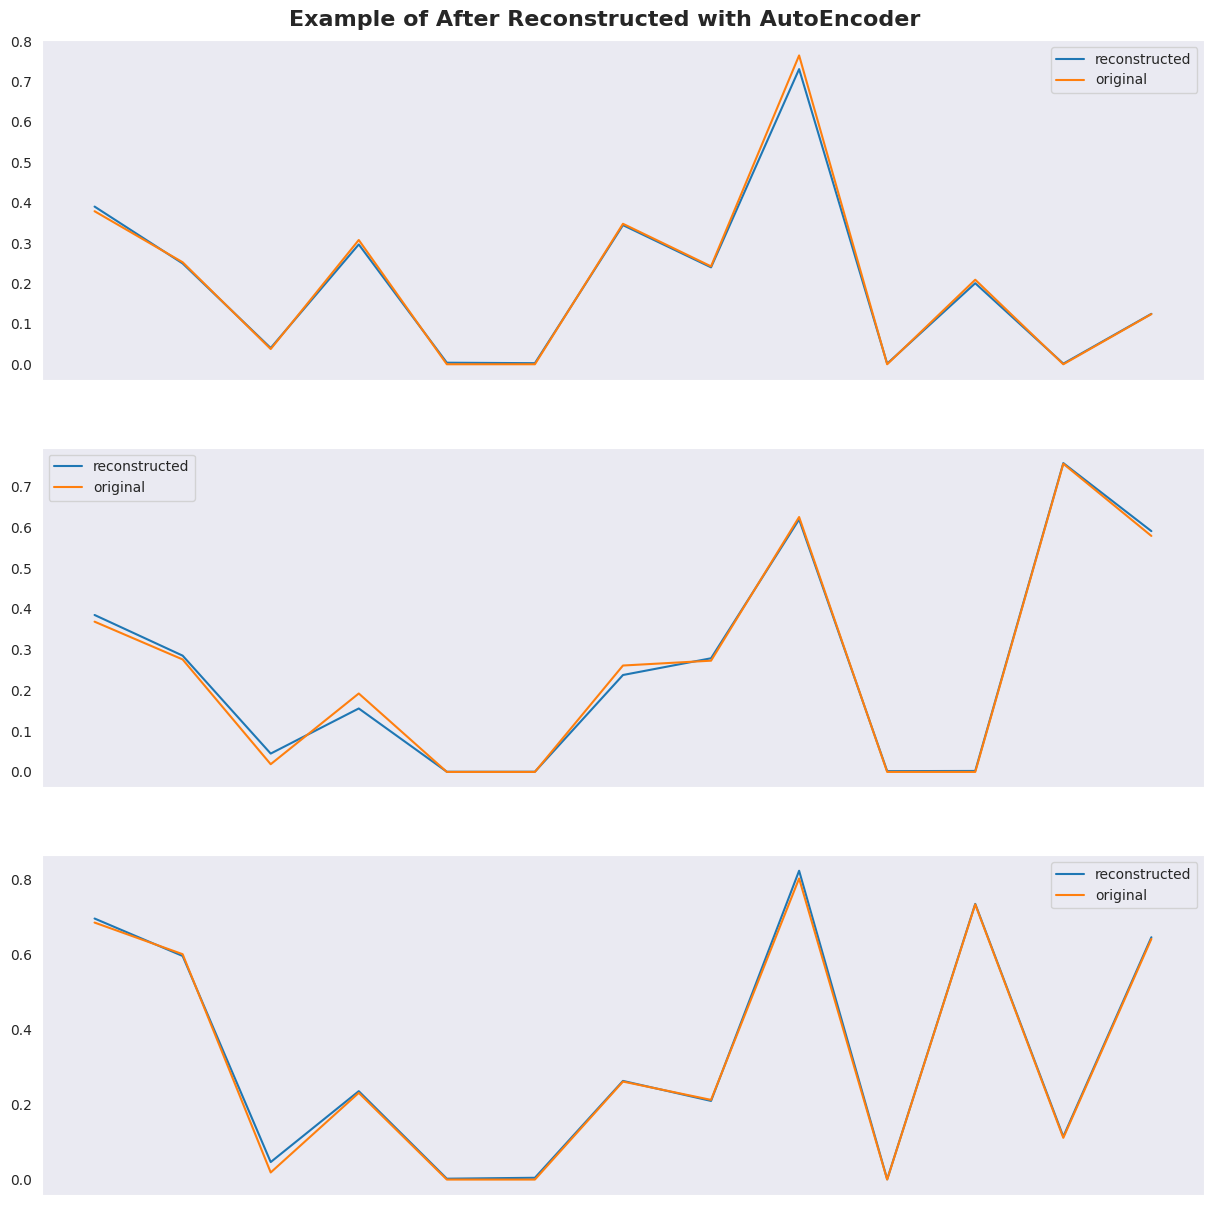

In [34]:
plot_orig_vs_recon("Example of After Reconstructed with AutoEncoder")

In [35]:
#Create encoder model
encoder = Model(inputs = input_dim, outputs = encoded9)
encoded_input = Input(shape = (latent_dim, ))

#Create dataframe to train set
encoded_train = pd.DataFrame(encoder.predict(df_train[numerical_features]))
encoded_train = encoded_train.add_prefix("feature")

#Create dataframe to test set
encoded_test = pd.DataFrame(encoder.predict(df_test[numerical_features]))
encoded_test = encoded_test.add_prefix("feature")

#Dimensionality reduction to train and test set
df_train = df_train.drop(numerical_features, axis = 1)
df_train = pd.concat([df_train, encoded_train], axis = 1)

df_test = df_test.drop(numerical_features, axis = 1)
df_test = pd.concat([df_test, encoded_test], axis = 1)

2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [36]:
print(f"New Train Set shaoe: {df_train.shape}")

New Train Set shaoe: (76518, 24)


# <p style="background-color: #17333D; font-family: Times New Roman; color: white; font-size: 150%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>MODELING</strong></p>

In [37]:
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import time

In [38]:
dict_map = {
        "Graduate": 0,
        "Dropout": 1,
        "Enrolled": 2
           
}

#Map target feature in train set
df_train["Target"] = df_train["Target"].map(dict_map)

In [39]:
#Set id as a index
df_train = df_train.set_index("id")
df_test = df_test.set_index("id")

#Specify categoric variables
cat_features = [
        "Marital status",
        "Application mode",
        "Application order",
        "Course",
        "Daytime/evening attendance",
        "Previous qualification",
        "Nacionality",
        "Mother's qualification",
        "Father's qualification",
        "Mother's occupation",
        "Father's occupation",
        "Displaced",
        "Educational special needs",
        "Debtor",
        "Tuition fees up to date",
        "Gender",
        "Scholarship holder",
        "International"
]

#Change datatype to category
df_train[cat_features] = df_train[cat_features].astype("category")
df_test[cat_features] = df_test[cat_features].astype("category")

In [40]:
#Determine StratifiedKFold
st_kfold = StratifiedKFold(n_splits = config.n_splits)

In [41]:
def create_model(
                X: pd.DataFrame,
                y: pd.Series,
                cv: sklearn.model_selection,
                model
                
):
    #Create empty lists to 
    models = list()
    val_preds = list()
    fold_val_acc_scores = list()
    elapsed_time = 0
    for idx, (train_idx, val_idx) in enumerate(cv.split(X=X, y = y)):
        start_time = time.time()

        print(f"train_idx: {train_idx}")
        print(f"val_idx: {val_idx}")

        X_train = X.iloc[train_idx].copy()
        y_train = y.iloc[train_idx].copy()
        X_val = X.iloc[val_idx].copy()
        y_val = y.iloc[val_idx].copy()


        model.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_val, y_val)],
                  verbose=250)


        val_pred = model.predict(X_val)
        val_preds.append(val_pred)

        fold_val_acc_score = accuracy_score(y_true = y_val, y_pred = val_pred)
        print(f"\nFold {idx + 1} Accuracy Score for Val Set:{fold_val_acc_score}")


        fold_val_acc_scores.append(fold_val_acc_score)

        #model_file_path = f"{name}_fold_{idx + 1}.pkl"
        #joblib.dump(model, os.path.join(config.model_path, model_file_path))
        models.append(model)

        end_time = time.time()
        elapsed = end_time - start_time
        print(f"Time to Model for Fold {idx + 1}: {elapsed}")
        print("*"*120)

        elapsed_time += elapsed

    print(f"model run time is : {elapsed_time} seconds")
    print(f"model has a mean of Accuracy Score for Val Set: {np.mean(fold_val_acc_scores)}")
    print("*"*120)


    return fold_val_acc_scores, models, val_preds

In [42]:
X_train = df_train.drop("Target", axis = 1).copy()
y_train = df_train["Target"].copy()
X_test = df_test.copy()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (76518, 22)
y_train shape: (76518,)
X_test shape: (51012, 22)


## <p style="background-color: #f5b342; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>XGBOOST</strong></p>

In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
from xgboost import XGBClassifier

In [45]:
params_XGB = {
    "booster": "gbtree",
    #"device": "gpu", #if you want to use gpu
    "max_depth": 2,
    "lambda": 1, #L2 regularization
    "tree_method": "hist", #Faster histogram optimized approximate greedy algorithm.
    "grow_policy": "depthwise", #Controls a way new nodes are added to the tree.
    "enable_categorical": True,
    "objective": "multi:softmax",
    "eval_metric": "merror", #(wrong cases)/(all cases)
    "learning_rate": 0.01,
    "early_stopping_rounds" : 500,
    "seed": 42,
    "n_estimators":5000 
    
}

model = XGBClassifier(**params_XGB)


In [46]:
fold_val_acc_scores_xgboost, models_xgb, val_preds_xgb = create_model(X = X_train,
                                                                     y = y_train,
                                                                     cv = st_kfold,
                                                                     model = model)

train_idx: [15187 15188 15189 ... 76515 76516 76517]
val_idx: [    0     1     2 ... 15374 15378 15380]
[0]	validation_0-merror:0.29794	validation_1-merror:0.29829
[250]	validation_0-merror:0.25465	validation_1-merror:0.25706
[500]	validation_0-merror:0.24473	validation_1-merror:0.24562
[750]	validation_0-merror:0.23833	validation_1-merror:0.24026
[1000]	validation_0-merror:0.23054	validation_1-merror:0.23458
[1250]	validation_0-merror:0.22630	validation_1-merror:0.23151
[1500]	validation_0-merror:0.22341	validation_1-merror:0.22857
[1750]	validation_0-merror:0.22085	validation_1-merror:0.22706
[2000]	validation_0-merror:0.21889	validation_1-merror:0.22478
[2250]	validation_0-merror:0.21758	validation_1-merror:0.22256
[2500]	validation_0-merror:0.21587	validation_1-merror:0.22164
[2750]	validation_0-merror:0.21436	validation_1-merror:0.22066
[3000]	validation_0-merror:0.21317	validation_1-merror:0.21909
[3250]	validation_0-merror:0.21177	validation_1-merror:0.21811
[3500]	validation_0-

## <p style="background-color: #f5b342; font-family: Times New Roman; color: white; font-size: 130%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Deep Learning</strong></p>

In [47]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.regularizers import l2

In [48]:
#Create one hot encoder
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

#One hot encoder to train set
results_train = one_hot_encoder.fit_transform(X_train[cat_features])
X_train = pd.concat([X_train, pd.DataFrame(results_train, index = X_train.index)], axis = 1)
X_train = X_train.drop(cat_features, axis = 1)

#One hot encoder to test set
results_test = one_hot_encoder.transform(X_test[cat_features])
X_test = pd.concat([X_test, pd.DataFrame(results_test, index = X_test.index)], axis = 1)
X_test = X_test.drop(cat_features, axis = 1)

print(f"X_train shape after One Hot Encoder: {X_train.shape}")
print(f"X_test shape after One Hot Encoder: {X_test.shape}")

X_train shape after One Hot Encoder: (76518, 284)
X_test shape after One Hot Encoder: (51012, 284)


In [49]:
#Create early stopping conditions for MLP model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights=True, start_from_epoch = 10)

In [50]:
#Build deep learning model to classification
model = Sequential([
        Dense(64, activation = "leaky_relu", kernel_regularizer = l2(0.001), input_shape = (X_train.shape[1], )),
        Dense(32, activation = "leaky_relu", kernel_regularizer = l2(0.001)),
        Dense(16, activation = "leaky_relu", kernel_regularizer = l2(0.001)),
        Dense(3, activation = "softmax")
        
])
#Display sumamry of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │        18,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,899 (81.64 KB)

 Trainable params: 20,899 (81.64 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
def create_FCL_model(
                X:pd.DataFrame,
                y: pd.Series,
                cv:sklearn.model_selection,
                model: tf.keras.models,
                early_stopping: tf.keras.callbacks.EarlyStopping
):
    
    models = list()
    val_preds = list()
    fold_val_acc_scores = list()
    elapsed_time = 0
    histories = list()
    
    for idx, (train_idx, val_idx) in enumerate(cv.split(X = X, y = y)):
        start_time = time.time()
        
        X_train = np.array(X.iloc[train_idx].values.copy())
        y_train = np.array(y.iloc[train_idx].values.copy())
        
        X_val = np.array(X.iloc[val_idx].values.copy())
        y_val = np.array(y.iloc[val_idx].values.copy())
        
       
        model.compile(
            optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["acc"]
            
        )
        
        history = model.fit(X_train, 
                            y_train, 
                            epochs = 50, 
                            batch_size = 32, 
                            validation_data = (X_val, y_val), 
                            callbacks = [early_stopping], 
                            verbose = 2
                           )
        
        #Add history to list
        histories.append(history)
        #Predict val set
        val_pred = np.argmax(model.predict(X_val), axis = 1)   
        #Append predictions to list
        val_preds.append(val_pred)
        #Compute accuracy score for val set
        fold_val_acc_score = accuracy_score(y_true = y_val, y_pred = val_pred)
        print(f"\nFeed Forward Neural Network Model Fold {idx + 1} Accuracy Score for Val Set:{fold_val_acc_score}")
        #Append Accuracy score to list
        fold_val_acc_scores.append(fold_val_acc_score)

        #model_file_path = f"{name}_fold_{idx + 1}.pkl"
        #joblib.dump(model, os.path.join(config.model_path, model_file_path))
        models.append(model)

        end_time = time.time()
        elapsed = end_time - start_time
        print(f"Time to Feed Forward Neural Network Model for Fold {idx + 1}: {elapsed}")
        print("*"*120)

        elapsed_time += elapsed
        
    print(f"Feed Forward Neural Network Model run time is : {elapsed_time} seconds")
    print(f"Feed Forward Neural Network Model has a mean of Accuracy Score for Val Set: {np.mean(fold_val_acc_scores)}")
    print("*"*120)

    #mean_squared_error_scores.append(fold_test_mse_scores)

    return fold_val_acc_scores, models, histories, val_preds

In [52]:
fold_val_acc_scores_feed, models_feed, histories_feed, val_preds_feed = create_FCL_model(X_train,
                                                                                        y_train,
                                                                                        cv = st_kfold,
                                                                                        model = model,
                                                                                        early_stopping = early_stopping)

Epoch 1/50
1913/1913 - 5s - 2ms/step - acc: 0.7545 - loss: 0.6861 - val_acc: 0.7661 - val_loss: 0.6359
Epoch 2/50
1913/1913 - 3s - 2ms/step - acc: 0.7697 - loss: 0.6213 - val_acc: 0.7674 - val_loss: 0.6221
Epoch 3/50
1913/1913 - 3s - 2ms/step - acc: 0.7725 - loss: 0.6020 - val_acc: 0.7777 - val_loss: 0.5919
Epoch 4/50
1913/1913 - 3s - 2ms/step - acc: 0.7776 - loss: 0.5902 - val_acc: 0.7716 - val_loss: 0.6054
Epoch 5/50
1913/1913 - 3s - 2ms/step - acc: 0.7790 - loss: 0.5847 - val_acc: 0.7789 - val_loss: 0.5865
Epoch 6/50
1913/1913 - 3s - 2ms/step - acc: 0.7820 - loss: 0.5799 - val_acc: 0.7856 - val_loss: 0.5705
Epoch 7/50
1913/1913 - 5s - 3ms/step - acc: 0.7832 - loss: 0.5737 - val_acc: 0.7850 - val_loss: 0.5734
Epoch 8/50
1913/1913 - 3s - 2ms/step - acc: 0.7843 - loss: 0.5713 - val_acc: 0.7852 - val_loss: 0.5669
Epoch 9/50
1913/1913 - 3s - 2ms/step - acc: 0.7854 - loss: 0.5679 - val_acc: 0.7793 - val_loss: 0.5754
Epoch 10/50
1913/1913 - 3s - 2ms/step - acc: 0.7860 - loss: 0.5655 - val_

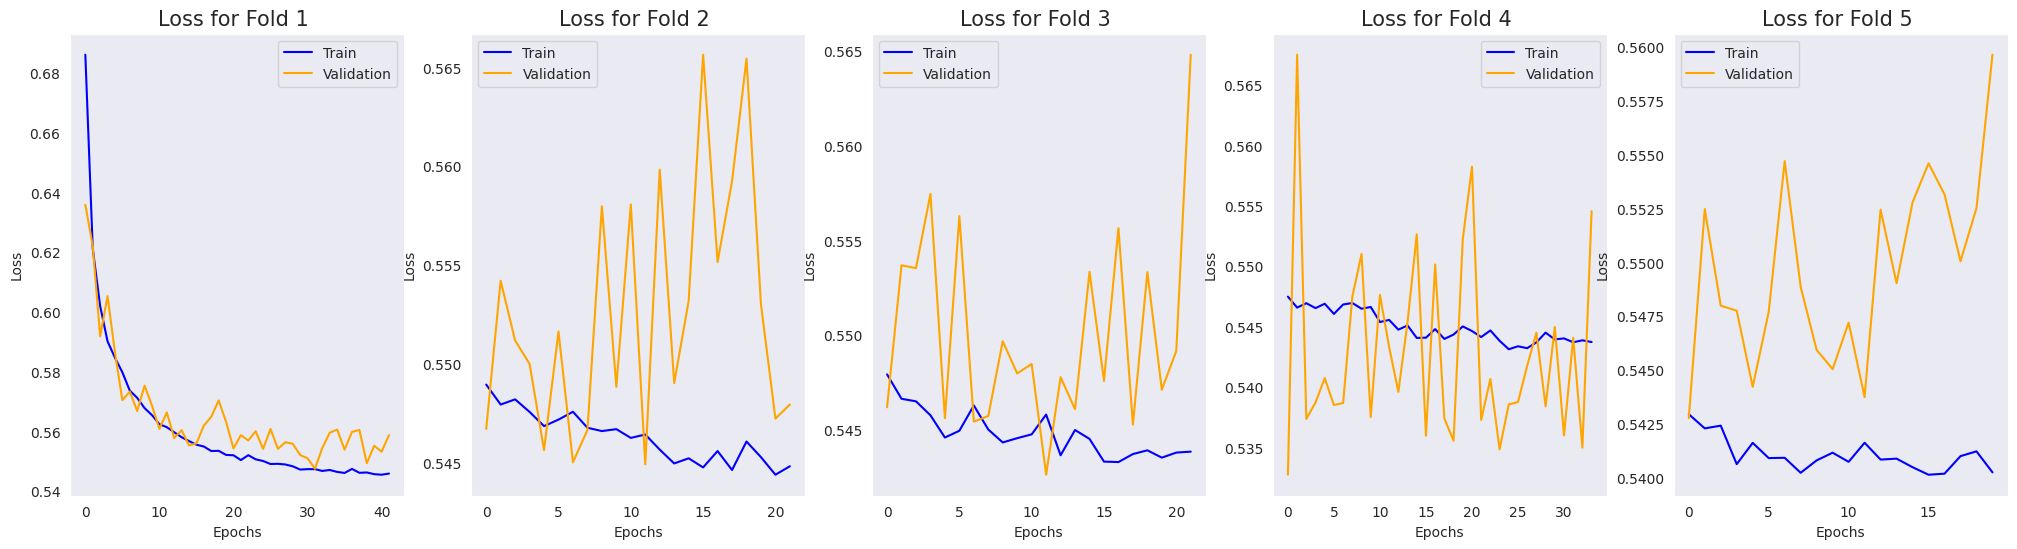

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols = config.n_splits, figsize = (25, 6))
for i, history in enumerate(histories_feed):
    #Lineplot for train and validation loss
    sns.lineplot(history.history["loss"], label = "Train", color = "blue", ax = ax[i])
    sns.lineplot(history.history["val_loss"], label = "Validation", color = "orange", ax = ax[i])
    
    #Set title for graph
    ax[i].set_title(f"Loss for Fold {i + 1} ", 
              fontsize = 15, 
              fontweight = 15)
    #Set x_axis and y_axis label
    ax[i].set_ylabel("Loss")
    ax[i].set_xlabel("Epochs")

#Display graph
plt.show()

# <p style="background-color: #f5425a; font-family: Times New Roman; color: white; font-size: 150%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>SUBMISSION</strong></p>

<p style="font-family: Times New Roman; color: white; font-size: 130%; text-align: left; border-radius: 15px 15px; padding: 15px;"> Best results belongs to XGBOOST model, so I am gonna use it</p>

In [54]:
#define best_model
best_model = XGBClassifier(**params_XGB)
#Define train and test set
X_train = df_train.drop("Target", axis = 1).copy()
y_train = df_train["Target"].copy()
X_test = df_test.copy()

#Fit model to train set
best_model.fit(X_train, y_train, eval_set = [(X_train, y_train)], verbose = 0)

#Split the data to train and val set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

#Prediction on the val set
y_pred_val = best_model.predict(X_val)

#Accuracy_score for val set
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Score for Val Set: {acc_val}")

Accuracy Score for Val Set: 0.788617354939885


In [55]:
df_sub.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [56]:
#Predict on the test set
y_pred_test = best_model.predict(X_test)
#Change taret feature with predictions
df_sub["Target"] = y_pred_test

inverse_map = {
    0:"Graduate",
    1:"Dropout",
    2:"Enrolled"
           
}
#İnverse map to Target feature
df_sub["Target"] = df_sub["Target"].map(inverse_map)
df_sub.to_csv("submission.csv")